#**PROCESAMIENTO DE DATOS**

##**1. Recopilación de datos**





Cargar librerias para nuestro ejemplo

In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('https://raw.githubusercontent.com/mn-ariel/AUX_DS_ML_2_2023/main/datasets/heart.csv')

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


###**Acerca de este conjunto de datos**

Descripción de la características

**Age:** edad del paciente [años]

**Sex:** sexo del paciente [M: Masculino, F: Femenino]

**ChestPainType:** tipo de dolor torácico [TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático]

**RestingBP:** presión arterial en reposo [mm Hg]

**Cholesterol:** colesterol sérico [mm/dl]

**FastingBS:** azúcar en sangre en ayunas [1: si BS en ayunas > 120 mg/dl, 0: es lo caso contrario]

**RestingECG:**** resultados del electrocardiograma en reposo [Normal: normal, ST: con anomalías en la onda ST-T (inversión de la onda T y/o elevación o depresión del ST > 0,05 mV), HVI: hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes]

**MaxHR:** frecuencia cardíaca máxima alcanzada [Valor numérico entre 60 y 202]

**ExerciseAngina:** angina inducida por el ejercicio [Y: Sí, N: No]

**Oldpeak:** oldpeak = ST [Valor numérico medido en depresión]

**ST_Slope:** la pendiente del segmento ST del ejercicio máximo [Up: pendiente ascendente, Flat: plana, Down: pendiente descendente]

**HeartDisease:** clase de salida [1: enfermedad cardíaca, 0: normal]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Comprobar valores nulos

In [41]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Estadísticas descriptivas**

In [43]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [44]:
df.describe(include = 'O')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [45]:
df.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [46]:
df[df.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [47]:
def rename(df):
    
    df.columns = df.columns.str.replace(".","", regex=True)
    df.columns = df.columns.str.lower().str.replace(" ","_")

rename(df)

In [48]:
df.head()

,age,sex,chestpaintype,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [49]:
num_col = []
cat_col = []

def num_cat_column(df):

    for col in df:
        if df[col].dtype !='object':
            num_col.append(col)
        else:
            cat_col.append(col)
    num_col.remove('heartdisease')

num_cat_column(df)

In [50]:
print('Numerical Column: ',num_col)
print('Categorical Column',cat_col)

Numerical Column:  ['age', 'restingbp', 'cholesterol', 'fastingbs', 'maxhr', 'oldpeak']
Categorical Column ['sex', 'chestpaintype', 'restingecg', 'exerciseangina', 'st_slope']


##**2. Análisis exploratorio de datos (EDA)**


In [52]:
def cat_col_view(cat_col):
    for i in cat_col :
        print(i)
        print(df[i].value_counts())
        print('-'*50)

cat_col_view(cat_col)

sex
M    725
F    193
Name: sex, dtype: int64
--------------------------------------------------
chestpaintype
ASY    496
NAP    203
ATA    173
TA      46
Name: chestpaintype, dtype: int64
--------------------------------------------------
restingecg
Normal    552
LVH       188
ST        178
Name: restingecg, dtype: int64
--------------------------------------------------
exerciseangina
N    547
Y    371
Name: exerciseangina, dtype: int64
--------------------------------------------------
st_slope
Flat    460
Up      395
Down     63
Name: st_slope, dtype: int64
--------------------------------------------------


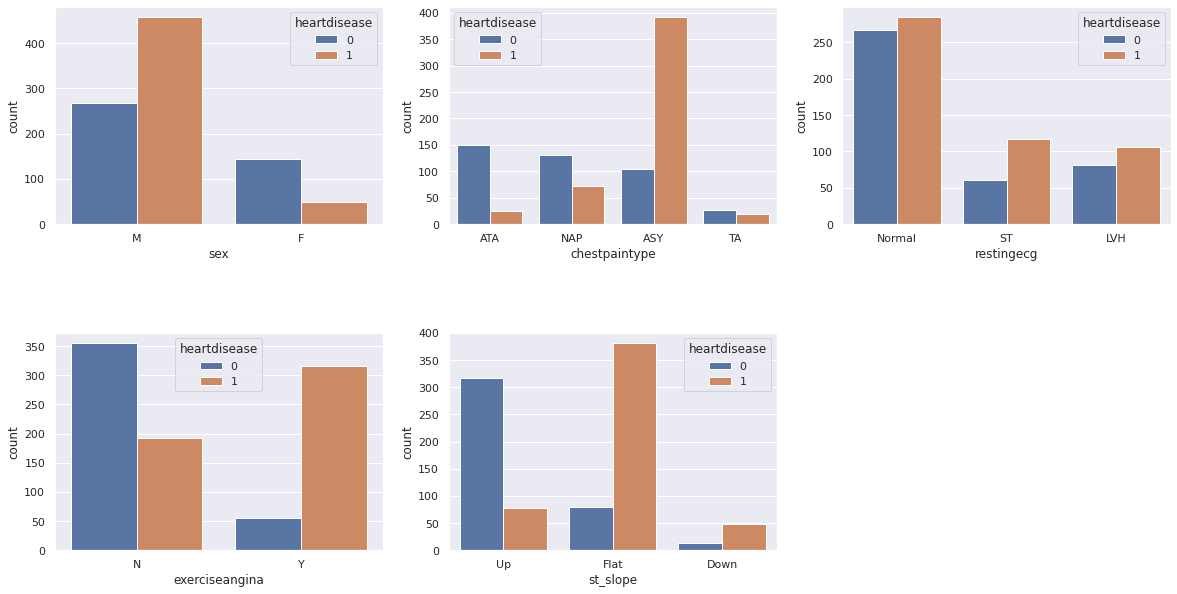

In [53]:
plt.figure(figsize=(20,10))
for i,col in enumerate(cat_col):
    plt.subplot(2,3,i+1)
    sns.countplot(data=df, x=col, hue='heartdisease')
    plt.subplots_adjust(hspace=0.5)
plt.show()

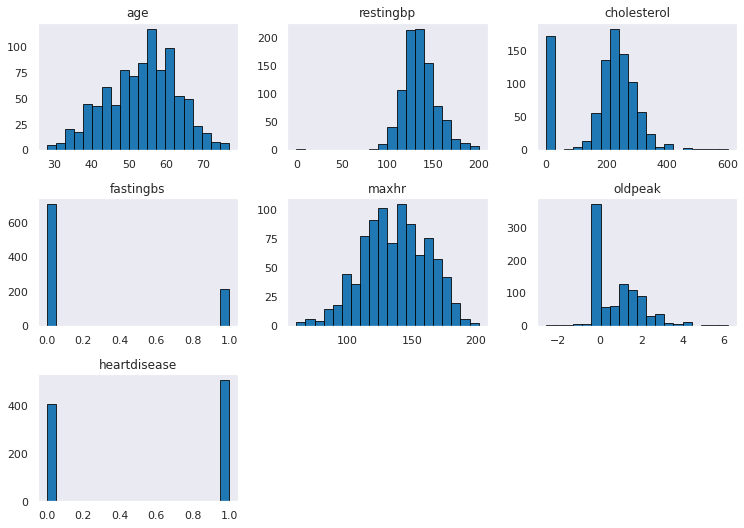

In [54]:
df.hist(bins=20, color='tab:blue', edgecolor='black', linewidth=.8, figsize=(7,5), grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5))

###**Outliers**

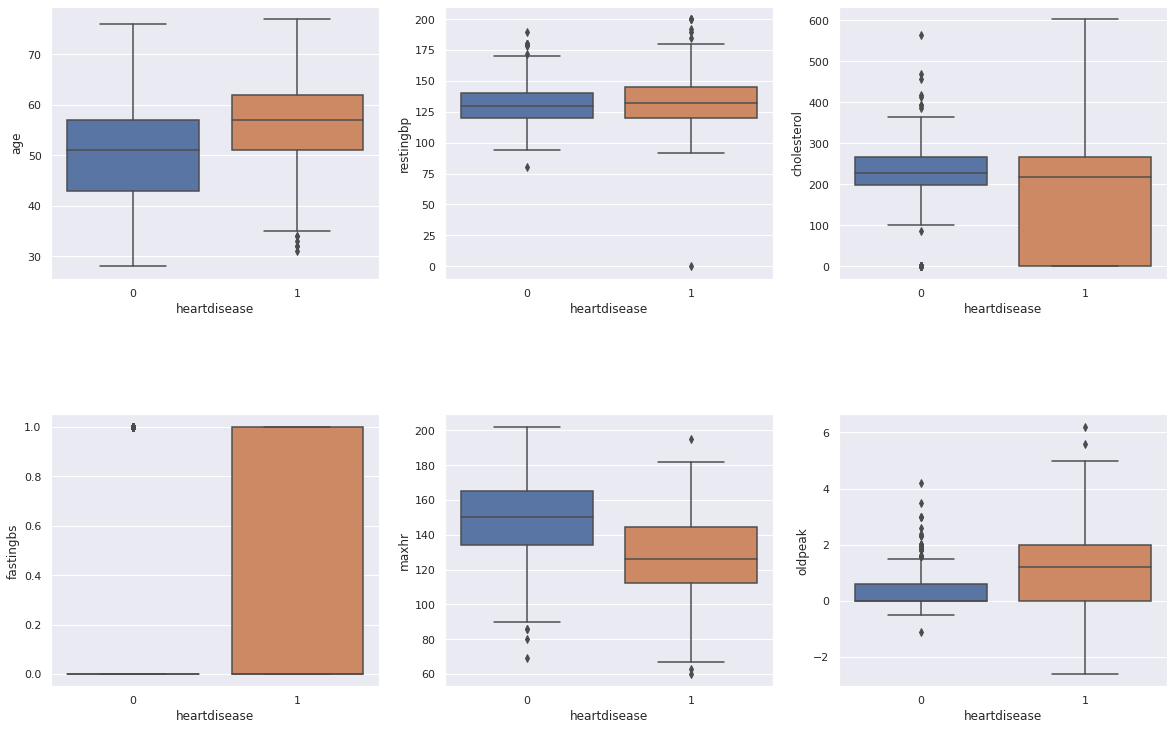

In [57]:
plt.figure(figsize=(20,20))
for i,col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df, y=col, x='heartdisease')
    plt.subplots_adjust(hspace=0.5)
plt.show()

**Outliers**

RestingBP, Cholesterol y Oldpeak tienen algunos valores atípicos, pero no los eliminamos a estos valores atípicos porque tal vez estos valores atípicos indiquen a un paciente con estos valores. Pero tenemos cero y nadie tiene RestingBP, Colesterol o Oldpeak igual a cero, es imposible. Así que lo quitaremos.

<Axes: xlabel='heartdisease', ylabel='age'>

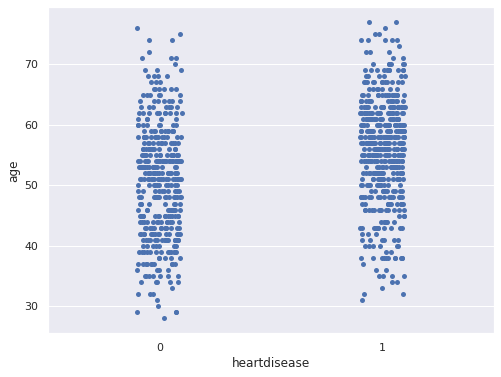

In [59]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="age", x ="heartdisease", data = df)

<Axes: xlabel='heartdisease', ylabel='restingbp'>

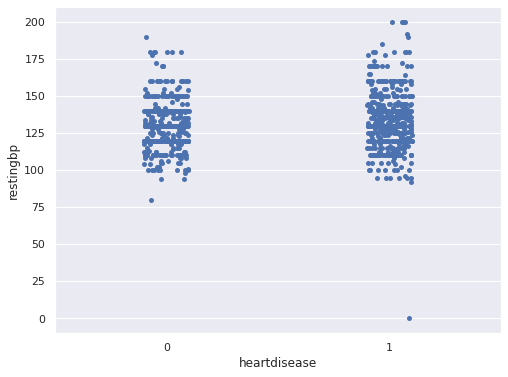

In [60]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="restingbp", x ="heartdisease", data = df)

<Axes: xlabel='heartdisease', ylabel='cholesterol'>

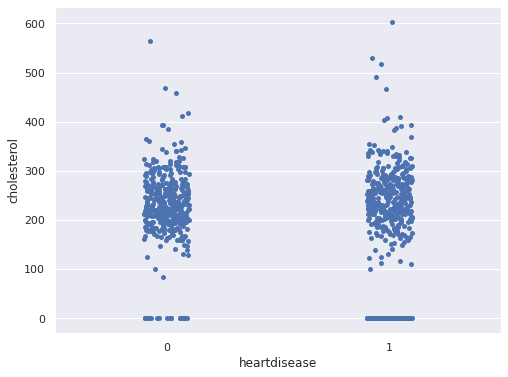

In [21]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="cholesterol", x ="heartdisease", data = df)

<Axes: xlabel='heartdisease', ylabel='oldpeak'>

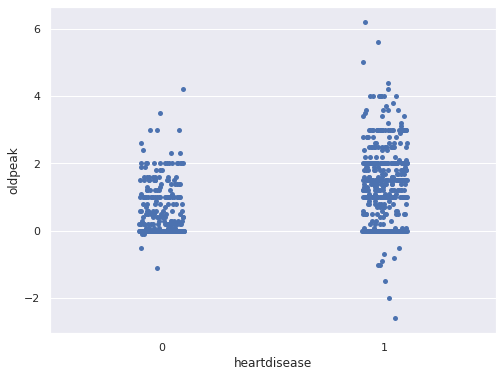

In [22]:
sns.set(rc = {'figure.figsize':(8,6)})
sns.stripplot(y="oldpeak", x ="heartdisease", data = df)

In [61]:
df = df[df['restingbp'] > 0]
df = df[df['cholesterol'] > 0]
df = df[df['oldpeak'] >= 0]

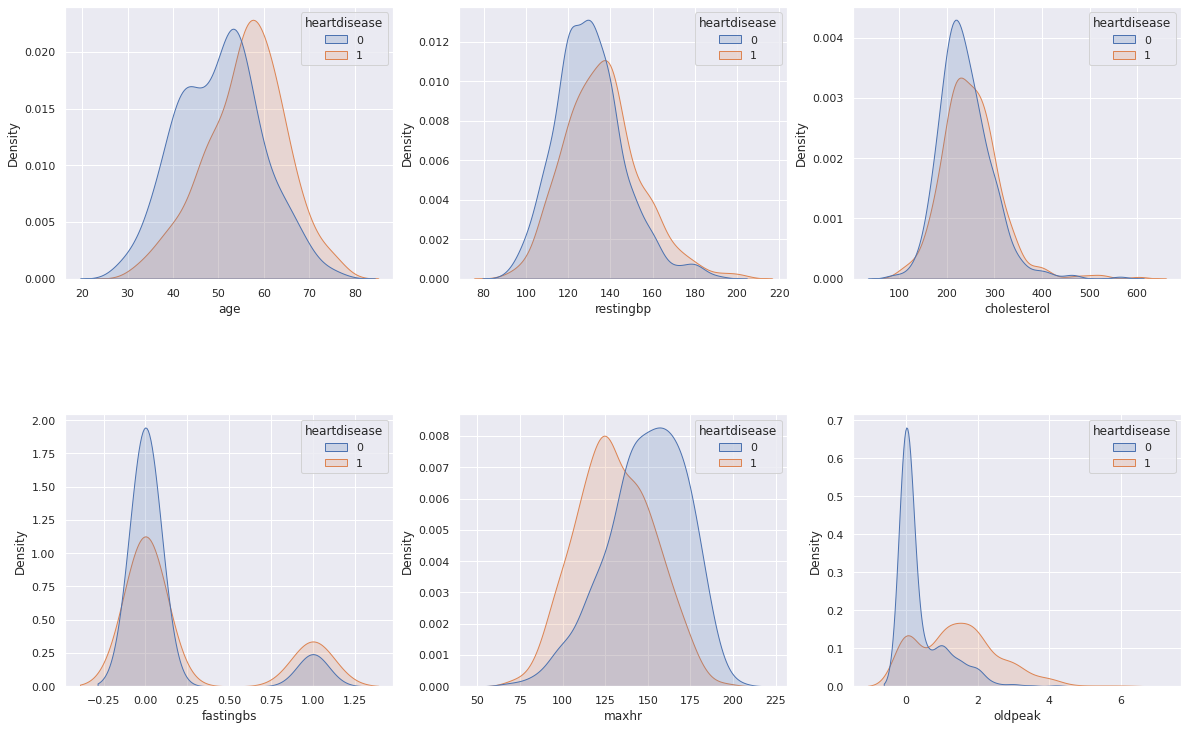

In [62]:
plt.figure(figsize=(20,20))
for i,col in enumerate(num_col):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data=df, x=col, hue='heartdisease',fill=True, alpha=0.2, warn_singular=False)
    plt.subplots_adjust(hspace=0.5)
plt.show()

###**Correlacion**

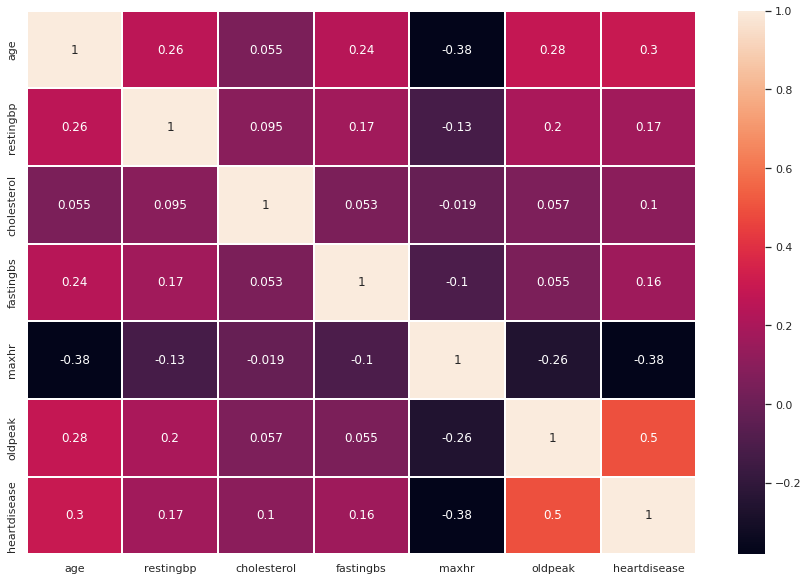

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linewidths=.4);

In [63]:
df.corr()

,age,restingbp,cholesterol,fastingbs,maxhr,oldpeak,heartdisease
age,1.000000,0.259074,0.055390,0.240810,-0.381774,0.284489,0.297092
restingbp,0.259074,1.000000,0.094986,0.173478,-0.125419,0.198008,0.172642
cholesterol,0.055390,0.094986,1.000000,0.053239,-0.018895,0.056824,0.102251
fastingbs,0.240810,0.173478,0.053239,1.000000,-0.102428,0.055045,0.160138
maxhr,-0.381774,-0.125419,-0.018895,-0.102428,1.000000,-0.259078,-0.376843
oldpeak,0.284489,0.198008,0.056824,0.055045,-0.259078,1.000000,0.495091
heartdisease,0.297092,0.172642,0.102251,0.160138,-0.376843,0.495091,1.000000


##**3. Limpieza de datos**


no aplica por que no tenemos valores faltantes

##**4. Transformación de datos**


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
cat_col_view(cat_col)

sex
M    563
F    182
Name: sex, dtype: int64
--------------------------------------------------
chestpaintype
ASY    370
NAP    168
ATA    166
TA      41
Name: chestpaintype, dtype: int64
--------------------------------------------------
restingecg
Normal    445
LVH       176
ST        124
Name: restingecg, dtype: int64
--------------------------------------------------
exerciseangina
N    458
Y    287
Name: exerciseangina, dtype: int64
--------------------------------------------------
st_slope
Flat    354
Up      348
Down     43
Name: st_slope, dtype: int64
--------------------------------------------------


In [29]:
df = pd.get_dummies(df, columns=["chestpaintype"])
df.head(10)

,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,40,M,140,289,0,Normal,172,N,0.0,Up,0,0,1,0,0
1,49,F,160,180,0,Normal,156,N,1.0,Flat,1,0,0,1,0
2,37,M,130,283,0,ST,98,N,0.0,Up,0,0,1,0,0
3,48,F,138,214,0,Normal,108,Y,1.5,Flat,1,1,0,0,0
4,54,M,150,195,0,Normal,122,N,0.0,Up,0,0,0,1,0
5,39,M,120,339,0,Normal,170,N,0.0,Up,0,0,0,1,0
6,45,F,130,237,0,Normal,170,N,0.0,Up,0,0,1,0,0
7,54,M,110,208,0,Normal,142,N,0.0,Up,0,0,1,0,0
8,37,M,140,207,0,Normal,130,Y,1.5,Flat,1,1,0,0,0
9,48,F,120,284,0,Normal,120,N,0.0,Up,0,0,1,0,0


In [30]:
df = df.apply(LabelEncoder().fit_transform)

In [31]:
df.head(10)

,age,sex,restingbp,cholesterol,fastingbs,restingecg,maxhr,exerciseangina,oldpeak,st_slope,heartdisease,chestpaintype_ASY,chestpaintype_ATA,chestpaintype_NAP,chestpaintype_TA
0,12,1,38,146,0,1,88,0,0,2,0,0,1,0,0
1,21,0,52,39,0,1,72,0,10,1,1,0,0,1,0
2,9,1,28,140,0,2,17,0,0,2,0,0,1,0,0
3,20,0,36,71,0,1,24,1,15,1,1,1,0,0,0
4,26,1,46,52,0,1,38,0,0,2,0,0,0,1,0
5,11,1,19,188,0,1,86,0,0,2,0,0,0,1,0
6,17,0,28,94,0,1,86,0,0,2,0,0,1,0,0
7,26,1,11,65,0,1,58,0,0,2,0,0,1,0,0
8,9,1,38,64,0,1,46,1,15,1,1,1,0,0,0
9,20,0,19,141,0,1,36,0,0,2,0,0,1,0,0


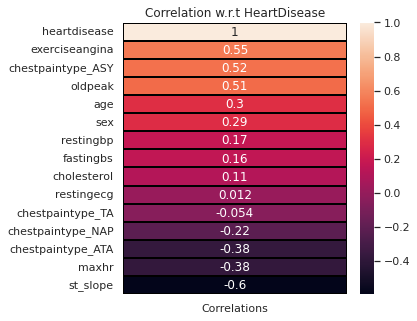

In [32]:
corr = df.corrwith(df['heartdisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

##**5. Selección de características**

In [34]:
X = df.drop('heartdisease',axis=1).values
y = df['heartdisease'].values

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scalr=StandardScaler(copy=True,with_mean=True,with_std=True)
X=scalr.fit_transform(X)

In [37]:
X

array([[-1.36454115,  0.5685668 ,  0.55916303, ...,  1.8676059 ,
        -0.53959353, -0.24132682],
       [-0.41179217, -1.75880829,  1.58774688, ..., -0.53544487,
         1.85324683, -0.24132682],
       [-1.68212414,  0.5685668 , -0.17553972, ...,  1.8676059 ,
        -0.53959353, -0.24132682],
       ...,
       [ 0.4350958 ,  0.5685668 , -0.17553972, ..., -0.53544487,
        -0.53959353, -0.24132682],
       [ 0.4350958 , -1.75880829, -0.17553972, ...,  1.8676059 ,
        -0.53959353, -0.24132682],
       [-1.57626314,  0.5685668 ,  0.41222248, ..., -0.53544487,
         1.85324683, -0.24132682]])

In [38]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

##**5. Modelo**